# Bitcoin Price Linear Regression (Least Squares)
this notebook is implementation of a model to fit a line for Bitcoin Price in a specific time.

In [1]:
# import required modules

from matplotlib import pyplot as plt
import numpy as np

In [2]:
# load bitcoin price data in .npy format

X = np.load('../btc_price.npy')
X.shape

(2500,)

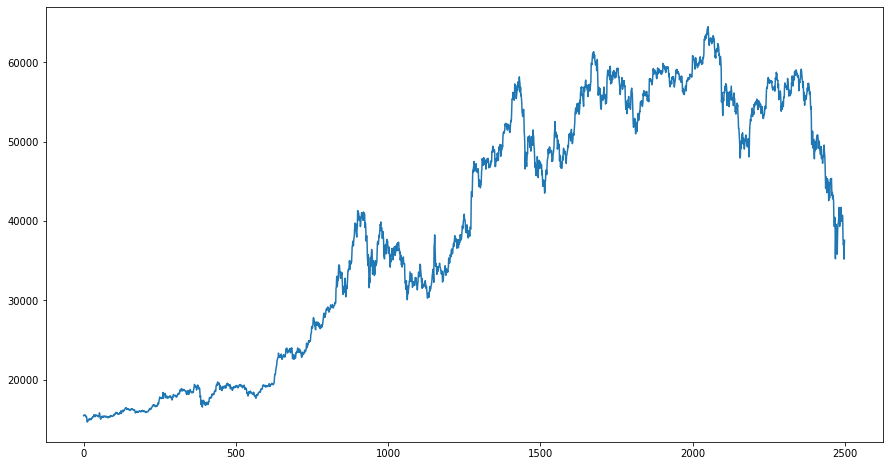

In [3]:
plt.figure(figsize=(15, 8))
plt.plot(X)

In [4]:
# implementation of Least Squares function to calculate vector x
# in this implementation, I used np.linalg.pinv to invert matrices 
# which are not invertible too, to ensure this matrix can be calculated.

def least_squares(lambda_, y):
    n = len(y)
    identity = np.eye(n)
    D = (np.c_[np.eye(n-1), np.zeros(n-1)] - np.c_[np.zeros(n-1), np.eye(n-1)]) * (lambda_ ** (0.5))
    A_prime = np.concatenate((identity, D), axis=0)
    b_prime = np.concatenate((y, np.zeros(n-1)), axis=0)
    x = (np.linalg.pinv(A_prime.T @ A_prime)) @ A_prime.T @ b_prime
    return x

In [62]:
lambda_ = 450
res = least_squares(lambda_, X)

Text(0.5, 1.0, 'Denoised Graph')

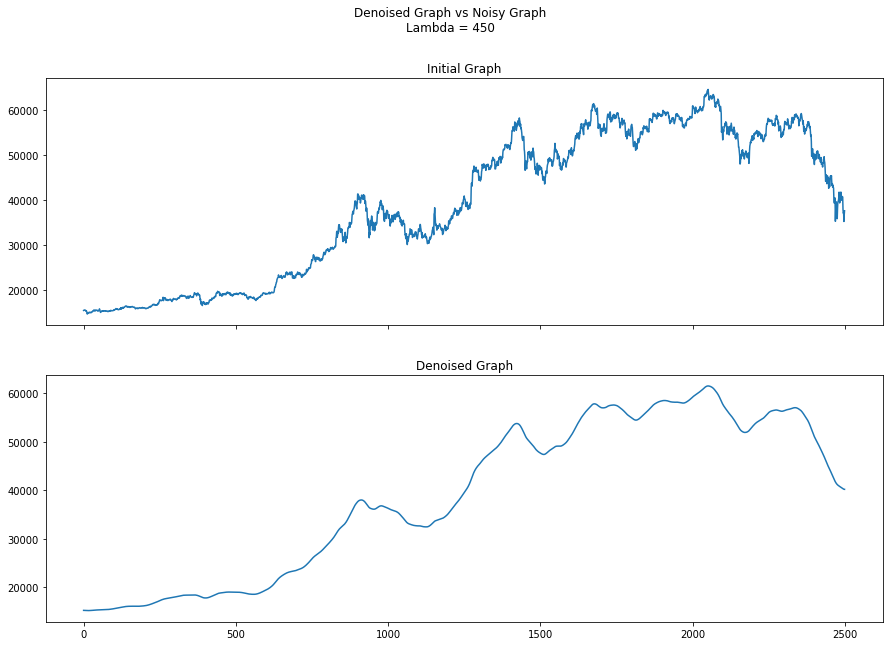

In [64]:
fig, ax = plt.subplots(2, figsize=(15, 10), sharex=True)
fig.suptitle(f'Denoised Graph vs Noisy Graph\nLambda = {lambda_}')
ax[0].plot(X, label='input')
# ax[0].plot(res, label='output')
ax[0].set_title('Initial Graph')
ax[1].plot(res, label='output')
ax[1].set_title('Denoised Graph')